# Oasis InfoByte DataScience Task-I

### Flower Type Classification
#### using Iris Flower Classification and machine learning


###### Libraries used:-
*Pandas, Numpy, Matplotlib, skLearn etc*

###### Dataset Used :-
*Iris Flower Classification*

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [24]:
# importing Utility Useful later (Label Encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Dataset Import

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

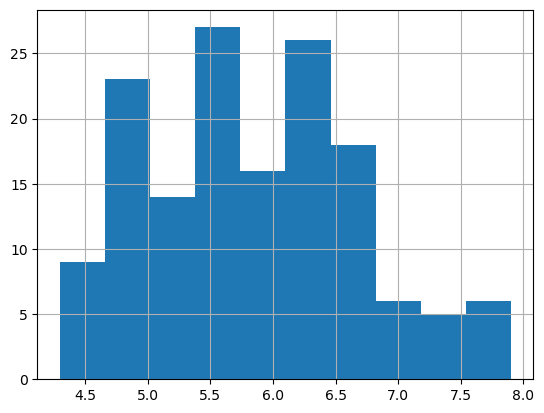

In [6]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

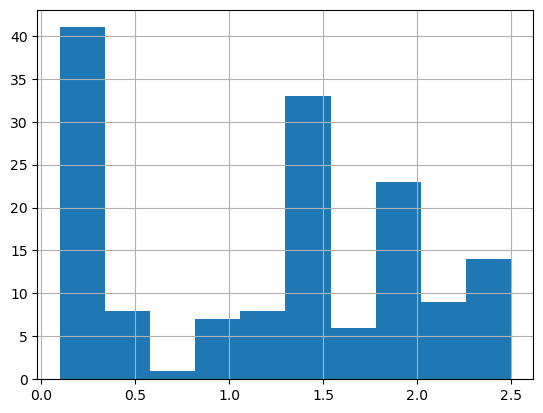

In [10]:
df['PetalWidthCm'].hist()

<AxesSubplot:>

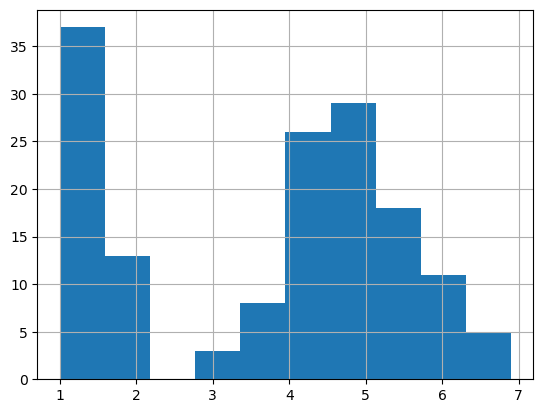

In [8]:
df['PetalLengthCm'].hist()

# Plotting and Visualization

In [11]:
colours = ['red' , 'green', 'blue']

In [12]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

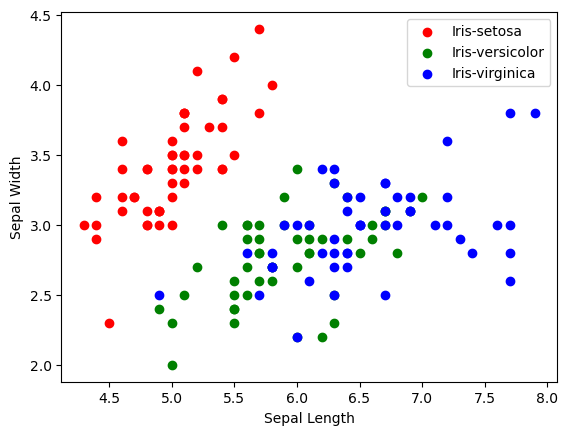

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colours[i], label = species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

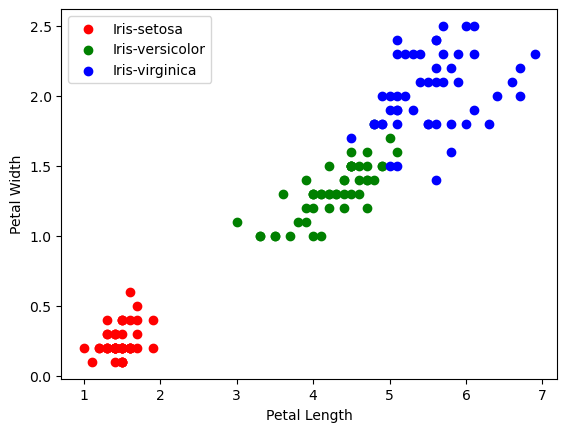

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colours[i], label = species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

# Co-relation Matrix 
##### (Each cell in the table shows the corelation between two variables)

In [20]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


##### *Deleting id column

In [19]:
df.drop(columns = ['Id'], inplace = True)

### Co-relation Heatmap ---->

<AxesSubplot:>

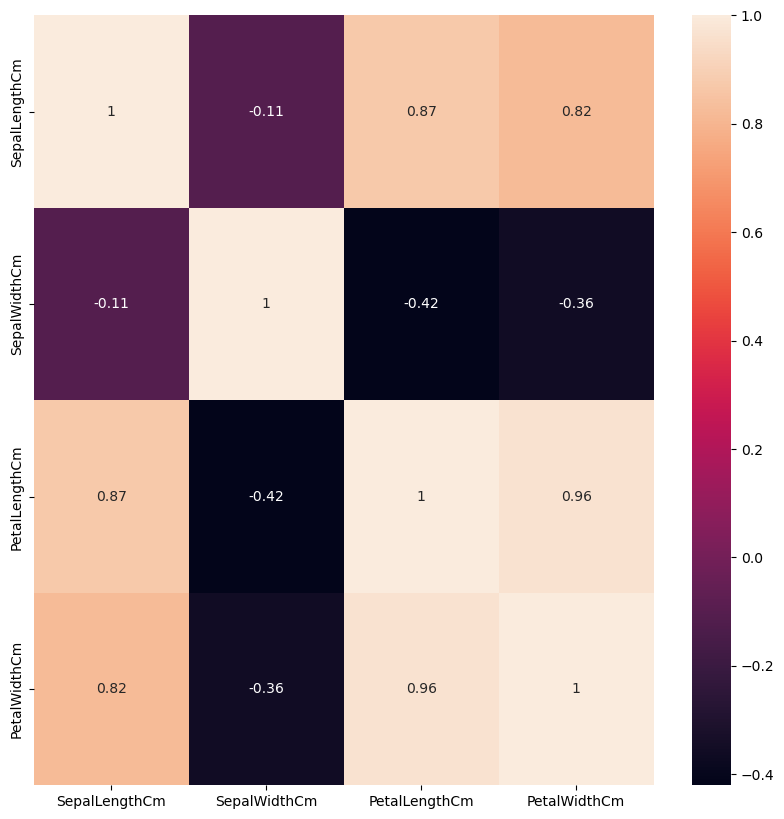

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True, ax=ax)

# Label Encoder

In [25]:
df['Species'] = le.fit_transform(df['Species'])

In [26]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [41]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Species'])
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20) #Splitting 80(train) - 20(testing)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [43]:
print("accuracy :- ", model.score(x_test, y_test)*100) # accuracy of the model

accuracy :-  96.66666666666667
